# Kernel Ridge (RBF) para Predicción de Temperatura (_2)
Este notebook implementa Kernel Ridge Regression (con kernel RBF) para predecir temperatura, usando escalado adecuado de variables. Incluye todas las curvas y métricas relevantes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, cross_val_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargar el dataset
dataset = pd.read_csv('../dataset/ML1_temperature.xlsx - Hoja1.csv', decimal=',')
x = dataset.drop(['recnt_Humidity','recnt_Temperature'], axis=1).values
y = dataset['recnt_Temperature'].values.reshape(-1, 1)

In [3]:
# Escalar X e y
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y)

In [4]:
# Separar en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

## Curva de aprendizaje
Muestra cómo varía el error (MSE) al predecir temperatura según el tamaño del conjunto de entrenamiento.

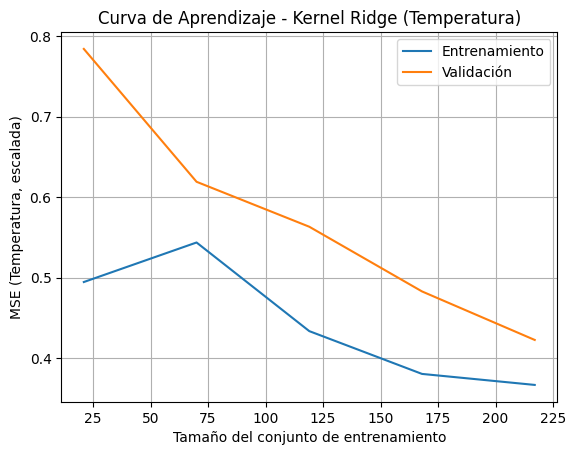

In [5]:
train_sizes, train_scores, val_scores = learning_curve(KernelRidge(kernel='rbf', gamma=0.1), x_train, y_train.ravel(), cv=5, scoring='neg_mean_squared_error')
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Entrenamiento')
plt.plot(train_sizes, -val_scores.mean(axis=1), label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('MSE (Temperatura, escalada)')
plt.title('Curva de Aprendizaje - Kernel Ridge (Temperatura)')
plt.legend()
plt.grid(True)
plt.show()

## Curva de validación
Muestra el desempeño del modelo para diferentes valores de gamma.

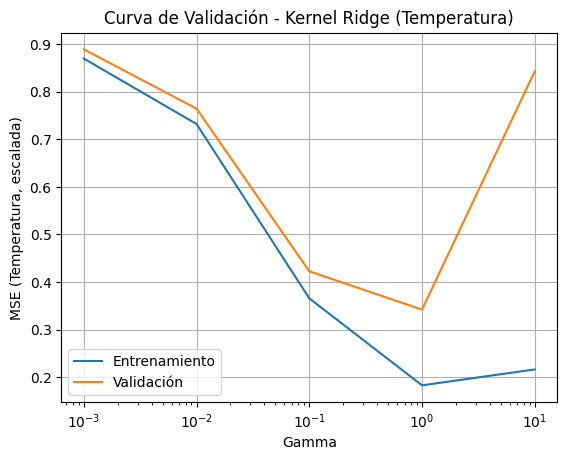

In [6]:
gammas = np.logspace(-3, 1, 5)
train_scores, val_scores = validation_curve(KernelRidge(kernel='rbf'), x_train, y_train.ravel(), param_name='gamma', param_range=gammas, cv=5, scoring='neg_mean_squared_error')
plt.semilogx(gammas, -train_scores.mean(axis=1), label='Entrenamiento')
plt.semilogx(gammas, -val_scores.mean(axis=1), label='Validación')
plt.xlabel('Gamma')
plt.ylabel('MSE (Temperatura, escalada)')
plt.title('Curva de Validación - Kernel Ridge (Temperatura)')
plt.legend()
plt.grid(True)
plt.show()

## Curva de paridad
Compara las predicciones de temperatura con los valores reales (desescalados).

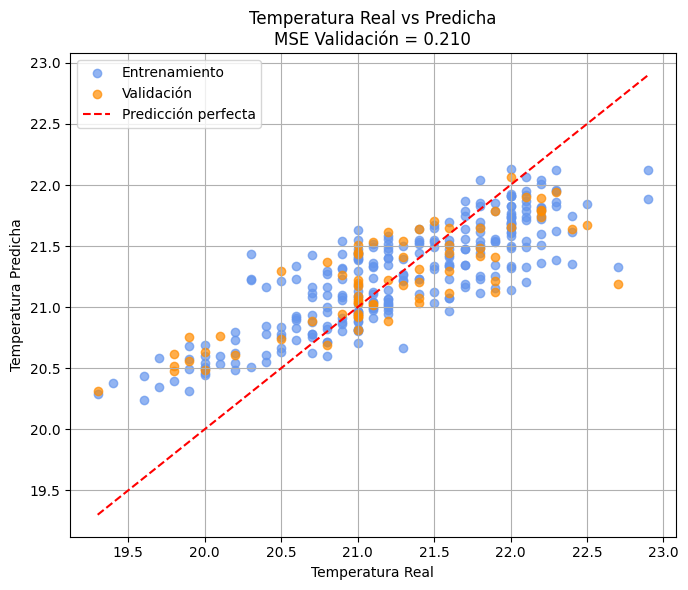

R^2 validación (Temperatura): 0.610


In [8]:
# Curva de paridad mejorada: Temperatura Real vs Predicha (Entrenamiento y Validación, desescalados)
plt.figure(figsize=(7,6))
plt.scatter(scaler_y.inverse_transform(y_train), scaler_y.inverse_transform(rbf_model.predict(x_train).reshape(-1, 1)), alpha=0.7, label='Entrenamiento', color='cornflowerblue')
plt.scatter(y_val_inv, y_val_pred_inv, alpha=0.7, label='Validación', color='darkorange')
plt.plot([min(y_val_inv.min(), scaler_y.inverse_transform(y_train).min()), max(y_val_inv.max(), scaler_y.inverse_transform(y_train).max())],
         [min(y_val_inv.min(), scaler_y.inverse_transform(y_train).min()), max(y_val_inv.max(), scaler_y.inverse_transform(y_train).max())],
         'r--', label='Predicción perfecta')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.title(f'Temperatura Real vs Predicha\nMSE Validación = {mean_squared_error(y_val_inv, y_val_pred_inv):.3f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(f'R^2 validación (Temperatura): {r2_score(y_val_inv, y_val_pred_inv):.3f}')

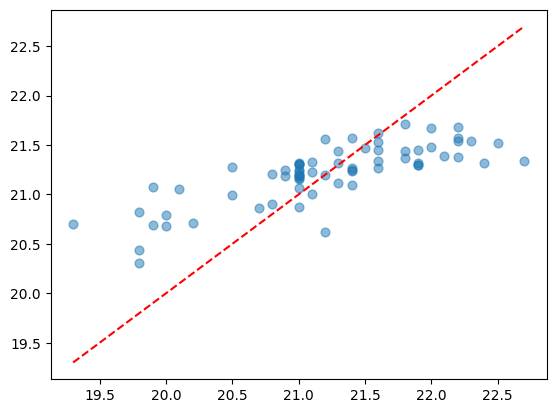

In [19]:
plt.scatter(y_val_inv, y_val_pred_inv, alpha=0.5, s=40)
plt.plot([y_val_inv.min(), y_val_inv.max()], [y_val_inv.min(), y_val_inv.max()], 'r--')

In [11]:
# Diagnóstico: Rango y valores de reales y predichos (desescalados)
print('Rango real:', y_val_inv.min(), y_val_inv.max())
print('Rango predicho:', y_val_pred_inv.min(), y_val_pred_inv.max())
print('Algunos valores reales:', y_val_inv[:5].ravel())
print('Algunos valores predichos:', y_val_pred_inv[:5].ravel())

Rango real: 19.3 22.7
Rango predicho: 20.309604413666584 22.066299755296487
Algunos valores reales: [22.1 20.7 21.  21.  21.6]
Algunos valores predichos: [21.90519273 20.88284702 20.94472376 21.43916927 21.65088611]


## Curva de sesgo y varianza
Analiza la diferencia entre el error de entrenamiento y validación (desescalados).

In [8]:
y_train_pred = rbf_model.predict(x_train)
y_train_pred_inv = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1))
y_train_inv = scaler_y.inverse_transform(y_train)
print(f'MSE Entrenamiento (Temperatura): {mean_squared_error(y_train_inv, y_train_pred_inv):.3f}')
print(f'MSE Validación (Temperatura): {mean_squared_error(y_val_inv, y_val_pred_inv):.3f}')
print(f'R^2 Entrenamiento (Temperatura): {r2_score(y_train_inv, y_train_pred_inv):.3f}')
print(f'R^2 Validación (Temperatura): {r2_score(y_val_inv, y_val_pred_inv):.3f}')

MSE Entrenamiento (Temperatura): 0.173
MSE Validación (Temperatura): 0.210
R^2 Entrenamiento (Temperatura): 0.649
R^2 Validación (Temperatura): 0.610


## Explicación breve
Kernel Ridge con RBF permite modelar relaciones no lineales, pero requiere escalado de variables. El desempeño se evalúa con las métricas y curvas anteriores.

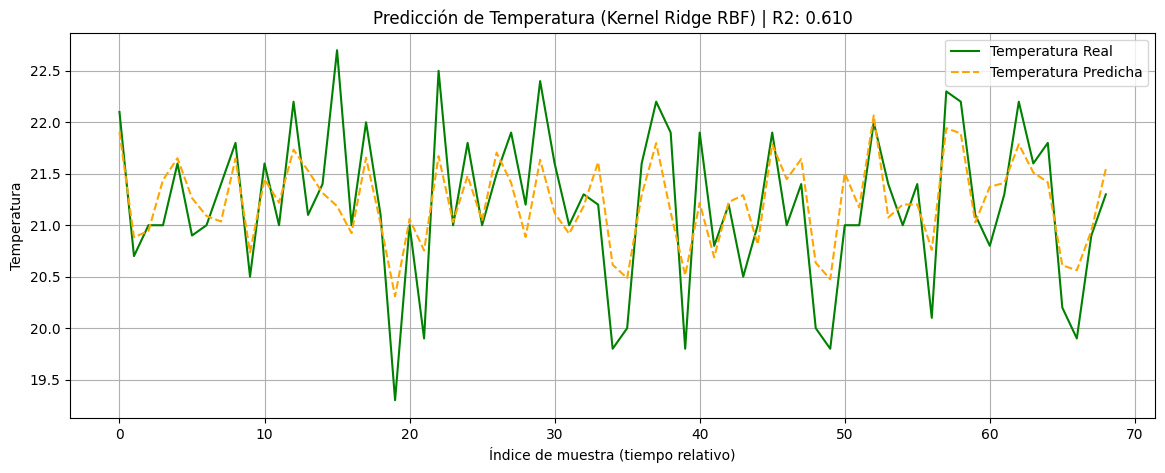

In [9]:
# Serie temporal: Temperatura real vs predicha (validación, desescalada)
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(y_val_inv)), y_val_inv, label='Temperatura Real', color='green')
plt.plot(np.arange(len(y_val_pred_inv)), y_val_pred_inv, label='Temperatura Predicha', color='orange', linestyle='--')
plt.xlabel('Índice de muestra (tiempo relativo)')
plt.ylabel('Temperatura')
plt.title(f'Predicción de Temperatura (Kernel Ridge RBF) | R2: {r2_score(y_val_inv, y_val_pred_inv):.3f}')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Serie temporal: valores reales vs predichos
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.figure(figsize=(10,4))
plt.plot(range(len(y_val)), y_val, label='Real', color='royalblue', linewidth=2)
plt.plot(range(len(y_val_pred)), y_val_pred, label='Predicho', color='darkorange', linewidth=2)
plt.xlabel('Índice (tiempo)')
plt.ylabel('Variable objetivo')
plt.title(f'Serie temporal: Real vs Predicho (R²={r2_score(y_val, y_val_pred):.3f})')
plt.legend()
plt.tight_layout()
plt.show()